### Importing libraries -

In [1]:
import pandas as pd
import numpy as np
import io
import seaborn as sns
import matplotlib.pyplot as plt

### Reading the input data -

In [2]:
df = pd.read_csv("combined_tree.csv")

In [3]:
df.head()

,left_hand_angle,right_hand_angle,left_chest_angle,right_chest_angle,left_hip_angle,right_hip_angle,left_leg_angle,right_leg_angle,pose
0,331.170322,12.633493,355.585511,357.329813,2.371466,48.114660,0.317067,224.680947,tree
1,332.540765,9.248001,358.486211,353.119969,5.764203,49.933662,354.971926,226.330780,tree
2,0.000000,14.891520,0.000000,356.576180,2.568260,47.093215,359.196526,240.726303,tree
3,325.558411,17.990476,354.099712,359.010304,3.780276,48.827709,358.094748,224.422954,tree
4,0.000000,0.000000,0.000000,0.000000,0.548302,48.689436,4.257078,226.760700,tree


### Exploring the input data -

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 618 entries, 0 to 617
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   left_hand_angle    618 non-null    float64
 1   right_hand_angle   618 non-null    float64
 2   left_chest_angle   618 non-null    float64
 3   right_chest_angle  618 non-null    float64
 4   left_hip_angle     618 non-null    float64
 5   right_hip_angle    618 non-null    float64
 6   left_leg_angle     618 non-null    float64
 7   right_leg_angle    618 non-null    float64
 8   pose               618 non-null    object 
dtypes: float64(8), object(1)
memory usage: 43.6+ KB


### Converting the float values into int values -

In [5]:
print("Before conversion:")
print(df.dtypes)
df[['left_hand_angle','right_hand_angle','left_chest_angle','right_chest_angle','left_hip_angle','right_hip_angle','left_leg_angle','right_leg_angle']] = df[['left_hand_angle','right_hand_angle','left_chest_angle','right_chest_angle','left_hip_angle','right_hip_angle','left_leg_angle','right_leg_angle']].astype(int)
print("\nAfter conversion:")
print(df.dtypes)

Before conversion:
left_hand_angle      float64
right_hand_angle     float64
left_chest_angle     float64
right_chest_angle    float64
left_hip_angle       float64
right_hip_angle      float64
left_leg_angle       float64
right_leg_angle      float64
pose                  object
dtype: object

After conversion:
left_hand_angle       int64
right_hand_angle      int64
left_chest_angle      int64
right_chest_angle     int64
left_hip_angle        int64
right_hip_angle       int64
left_leg_angle        int64
right_leg_angle       int64
pose                 object
dtype: object


### Removing null values from the input data -

In [6]:
cols_to_remove = ['left_hand_angle','right_hand_angle','left_chest_angle','right_chest_angle','left_hip_angle','right_hip_angle','left_leg_angle','right_leg_angle']
for x in cols_to_remove :
    df = df[df[x] != 0]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 484 entries, 1 to 617
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   left_hand_angle    484 non-null    int64 
 1   right_hand_angle   484 non-null    int64 
 2   left_chest_angle   484 non-null    int64 
 3   right_chest_angle  484 non-null    int64 
 4   left_hip_angle     484 non-null    int64 
 5   right_hip_angle    484 non-null    int64 
 6   left_leg_angle     484 non-null    int64 
 7   right_leg_angle    484 non-null    int64 
 8   pose               484 non-null    object
dtypes: int64(8), object(1)
memory usage: 37.8+ KB


In [7]:
df = df[~df.isin(list(range(0, 2)) + list(range(358, 361))).any(axis=1)]

### Detecting outliers in the data -

In [8]:
df.describe()

,left_hand_angle,right_hand_angle,left_chest_angle,right_chest_angle,left_hip_angle,right_hip_angle,left_leg_angle,right_leg_angle
count,285.000000,285.000000,285.000000,285.00000,285.000000,285.000000,285.000000,285.000000
mean,338.880702,67.410526,17.438596,196.02807,159.968421,64.915789,353.726316,212.428070
std,27.208244,119.561537,49.396006,169.34376,174.824043,2.921496,29.169530,3.947622
min,24.000000,2.000000,2.000000,2.00000,2.000000,47.000000,6.000000,208.000000
25%,334.000000,10.000000,8.000000,11.00000,4.000000,64.000000,356.000000,210.000000
50%,341.000000,25.000000,11.000000,344.00000,6.000000,65.000000,356.000000,212.000000
75%,347.000000,28.000000,13.000000,350.00000,356.000000,66.000000,357.000000,214.000000
max,357.000000,357.000000,356.000000,357.00000,357.000000,69.000000,357.000000,238.000000


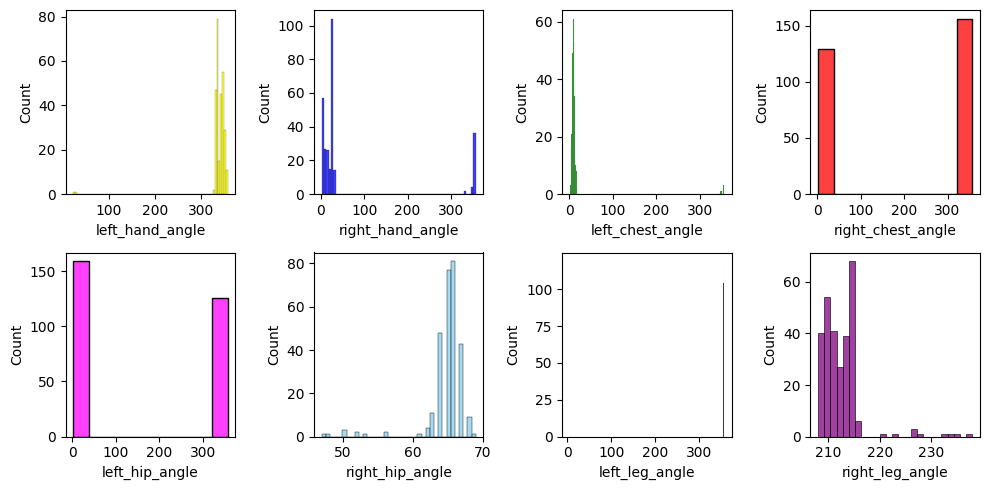

In [9]:
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(10, 5))
sns.histplot(data=df, x="left_hand_angle", color="yellow", ax=axs[0,0])
sns.histplot(data=df, x="right_hand_angle", color="blue", ax=axs[0,1])
sns.histplot(data=df, x="left_chest_angle", color="green", ax=axs[0,2])
sns.histplot(data=df, x="right_chest_angle", color="red", ax=axs[0,3])
sns.histplot(data=df, x="left_hip_angle", color="magenta", ax=axs[1,0])
sns.histplot(data=df, x="right_hip_angle", color="skyblue", ax=axs[1,1])
sns.histplot(data=df, x="left_leg_angle", color="black", ax=axs[1,2])
sns.histplot(data=df, x="right_leg_angle", color="purple", ax=axs[1,3])
plt.tight_layout()
plt.show()

### Removing the outliers -

#### 1) Calculating the inter-quartile range -

In [14]:
df = df.select_dtypes(include=['number'])
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1
print(iqr)

left_hand_angle       13.0
right_hand_angle      18.0
left_chest_angle       5.0
right_chest_angle    339.0
left_hip_angle       352.0
right_hip_angle        2.0
left_leg_angle         1.0
right_leg_angle        4.0
dtype: float64


#### 2) Dropping the outliers -

In [15]:
upper = q1-1.5*iqr
lower = q3+1.5*iqr
df = df[~((df < (upper)) | (df > (lower))).any(axis=1)]

#### 3) Checking whether any values have been dropped -

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 227 entries, 213 to 615
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   left_hand_angle    227 non-null    int64
 1   right_hand_angle   227 non-null    int64
 2   left_chest_angle   227 non-null    int64
 3   right_chest_angle  227 non-null    int64
 4   left_hip_angle     227 non-null    int64
 5   right_hip_angle    227 non-null    int64
 6   left_leg_angle     227 non-null    int64
 7   right_leg_angle    227 non-null    int64
dtypes: int64(8)
memory usage: 16.0 KB


### Ensuring that the outliers have been dropped -

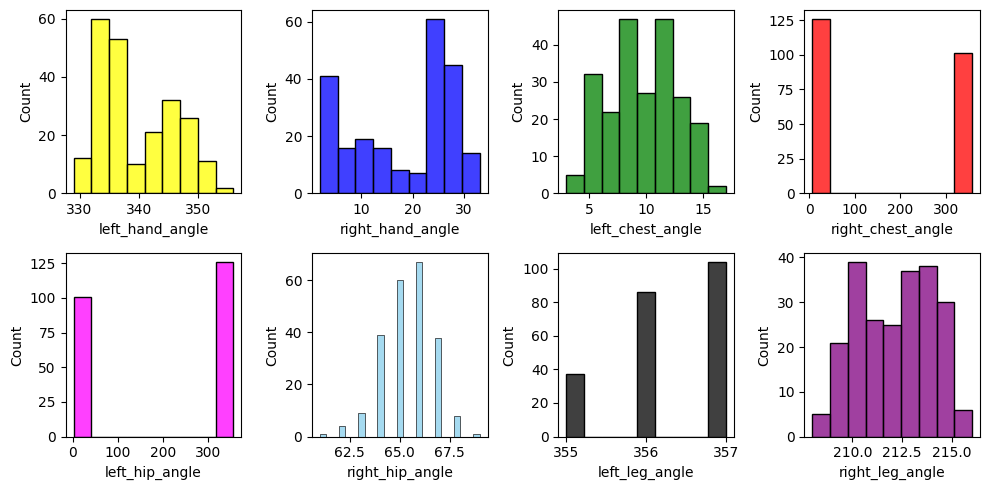

In [17]:
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(10, 5))
sns.histplot(data=df, x="left_hand_angle", color="yellow", ax=axs[0,0])
sns.histplot(data=df, x="right_hand_angle", color="blue", ax=axs[0,1])
sns.histplot(data=df, x="left_chest_angle", color="green", ax=axs[0,2])
sns.histplot(data=df, x="right_chest_angle", color="red", ax=axs[0,3])
sns.histplot(data=df, x="left_hip_angle", color="magenta", ax=axs[1,0])
sns.histplot(data=df, x="right_hip_angle", color="skyblue", ax=axs[1,1])
sns.histplot(data=df, x="left_leg_angle", color="black", ax=axs[1,2])
sns.histplot(data=df, x="right_leg_angle", color="purple", ax=axs[1,3])
plt.tight_layout()
plt.show()

In [18]:
df.describe()

,left_hand_angle,right_hand_angle,left_chest_angle,right_chest_angle,left_hip_angle,right_hip_angle,left_leg_angle,right_leg_angle
count,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000
mean,339.180617,18.387665,9.700441,162.052863,199.607930,65.431718,356.295154,212.176211
std,6.293554,9.857813,2.876230,169.828614,175.075687,1.316491,0.732388,2.102413
min,329.000000,2.000000,3.000000,7.000000,2.000000,61.000000,355.000000,208.000000
25%,334.000000,8.500000,7.000000,10.000000,5.000000,65.000000,356.000000,210.000000
50%,336.000000,24.000000,10.000000,12.000000,355.000000,66.000000,356.000000,212.000000
75%,345.000000,27.000000,12.000000,351.000000,356.000000,66.000000,357.000000,214.000000
max,356.000000,33.000000,17.000000,357.000000,357.000000,69.000000,357.000000,216.000000


### Reconverting the integer values to float values -

In [19]:
print("Before conversion:")
print(df.dtypes)
df[['left_hand_angle','right_hand_angle','left_chest_angle','right_chest_angle','left_hip_angle','right_hip_angle','left_leg_angle','right_leg_angle']] = df[['left_hand_angle','right_hand_angle','left_chest_angle','right_chest_angle','left_hip_angle','right_hip_angle','left_leg_angle','right_leg_angle']].astype(float)
print("\nAfter conversion:")
print(df.dtypes)

Before conversion:
left_hand_angle      int64
right_hand_angle     int64
left_chest_angle     int64
right_chest_angle    int64
left_hip_angle       int64
right_hip_angle      int64
left_leg_angle       int64
right_leg_angle      int64
dtype: object

After conversion:
left_hand_angle      float64
right_hand_angle     float64
left_chest_angle     float64
right_chest_angle    float64
left_hip_angle       float64
right_hip_angle      float64
left_leg_angle       float64
right_leg_angle      float64
dtype: object


### Shuffling the data -

In [20]:
df.head()

,left_hand_angle,right_hand_angle,left_chest_angle,right_chest_angle,left_hip_angle,right_hip_angle,left_leg_angle,right_leg_angle
213,331.0,28.0,6.0,9.0,355.0,66.0,357.0,215.0
215,334.0,29.0,7.0,10.0,356.0,67.0,356.0,216.0
216,333.0,25.0,10.0,8.0,355.0,66.0,357.0,215.0
217,335.0,26.0,10.0,8.0,357.0,66.0,356.0,215.0
218,336.0,28.0,10.0,9.0,355.0,66.0,357.0,215.0


In [21]:
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,left_hand_angle,right_hand_angle,left_chest_angle,right_chest_angle,left_hip_angle,right_hip_angle,left_leg_angle,right_leg_angle
0,344.0,8.0,13.0,351.0,5.0,67.0,355.0,210.0
1,347.0,4.0,11.0,350.0,5.0,65.0,355.0,212.0
2,337.0,25.0,9.0,9.0,355.0,64.0,357.0,214.0
3,348.0,8.0,12.0,351.0,3.0,64.0,357.0,209.0
4,332.0,30.0,6.0,11.0,356.0,64.0,357.0,215.0


### Keeping the first 150 rows and dropping the remaining -

In [22]:
df = df.iloc[:150]
df.tail()

,left_hand_angle,right_hand_angle,left_chest_angle,right_chest_angle,left_hip_angle,right_hip_angle,left_leg_angle,right_leg_angle
145,335.0,27.0,11.0,10.0,353.0,65.0,357.0,214.0
146,342.0,9.0,13.0,352.0,4.0,66.0,355.0,211.0
147,342.0,10.0,13.0,353.0,3.0,66.0,357.0,209.0
148,346.0,14.0,13.0,355.0,4.0,65.0,356.0,211.0
149,344.0,13.0,12.0,352.0,3.0,65.0,356.0,210.0


### Exporting the cleaned data -

In [23]:
df.to_csv(r'combined_clean_triangle.csv', index=False, header=True)